# Data Analysis
#### Data Analysis for the Stackoverflow developer survey data (2018-2022)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Merge All the CSV into one

In [146]:
combined_df = pd.DataFrame()
for file in os.listdir("../../Data/CleanData/"):
    df = pd.read_csv(f"../../Data/CleanData/{file}")
    combined_df = pd.concat([combined_df, df], axis=0)
combined_df = combined_df.reset_index(drop=True)
combined_df.shape

(137290, 10)

In [147]:
combined_df.head()

,Employment,EdLevel,DevType,Country,Currency,AnnualSalary,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year
0,Employed full-time,Bachelor’s degree,"['Database administrator', 'DevOps specialist'...",United Kingdom,GBP,70841.0,Yearly,"['JavaScript', 'Python', 'Bash/Shell']","['Go', 'Python']",2018
1,Employed full-time,Some college/university study without earning ...,"['Data or business analyst', 'Desktop or enter...",South Africa,ZAR,21426.0,Yearly,"['C', 'C++', 'Java', 'Matlab', 'R', 'SQL', 'Ba...","['Assembly', 'C', 'C++', 'Matlab', 'SQL', 'Bas...",2018
2,Employed full-time,Some college/university study without earning ...,"['Back-end developer', 'Front-end developer', ...",United States,USD,120000.0,Yearly,"['JavaScript', 'HTML', 'CSS']","['C', 'Go', 'JavaScript', 'Python', 'HTML', 'C...",2018
3,Employed full-time,Some college/university study without earning ...,"['Back-end developer', 'C-suite executive (CEO...",United States,USD,250000.0,Yearly,"['Assembly', 'CoffeeScript', 'Erlang', 'Go', '...","['Erlang', 'Go', 'Python', 'Rust', 'SQL']",2018
4,Employed full-time,Master’s degree,['Back-end developer'],Sweden,SEK,47904.0,Monthly,"['C#', 'SQL', 'HTML', 'CSS', 'Bash/Shell']","['C#', 'F#', 'Haskell', 'SQL', 'Ocaml']",2018


### Overview of Developers by Country

In [148]:
dev_by_country = combined_df.groupby("Country").size()\
    .reset_index(name="No_Devs").sort_values(by="No_Devs", ascending=False).reset_index(drop=True)
dev_by_country.head()


,Country,No_Devs
0,United States,28548
1,United States of America,16684
2,India,9584
3,United Kingdom,8613
4,Germany,8145


## Education Level and Salary
Use the average AnnualSalary for each EdLevel to see of there is a relationship.

In [149]:
edlevel_vs_salary = combined_df.groupby("EdLevel")["AnnualSalary"].mean().reset_index(name="MeanSalary")
edlevel_vs_salary

,EdLevel,MeanSalary
0,Associate degree,80651.505094
1,Bachelor’s degree,87499.211650
2,I never completed any formal education,77815.617577
3,Master’s degree,92399.707719
4,Other doctoral degree,120742.088731
5,Primary/elementary school,61259.919437
6,Professional degree,64883.347403
7,Secondary school,62861.564663
8,Some college/university study without earning ...,81360.607892
9,Something else,129635.650000


* We should drop the **"Something else"** category because it doesn't have any information as to the Education level of the developer under that group.
* Then we'll order our data by the general progression of education levels based on the typical educational system in many countries.
* Here's the ranking we'll use:

    1. I never completed any formal education
    2. Primary/elementary school
    3. Secondary school
    4. Some college/university study without earning a degree
    5. Associate degree
    6. Bachelor’s degree
    7. Master’s degree
    8. Professional degree
    9. Other doctoral degree

In [150]:
edlevel_vs_salary = edlevel_vs_salary.iloc[[2, 5, 7, 8, 0, 1, 3, 6, 4], :]
edlevel_vs_salary.loc[[2, 8, 4], "EdLevel"] = ["No Formal Education", "College/Uni(No degree)", "Doctoral Degree"]
edlevel_vs_salary

,EdLevel,MeanSalary
2,No Formal Education,77815.617577
5,Primary/elementary school,61259.919437
7,Secondary school,62861.564663
8,College/Uni(No degree),81360.607892
0,Associate degree,80651.505094
1,Bachelor’s degree,87499.211650
3,Master’s degree,92399.707719
6,Professional degree,64883.347403
4,Doctoral Degree,120742.088731


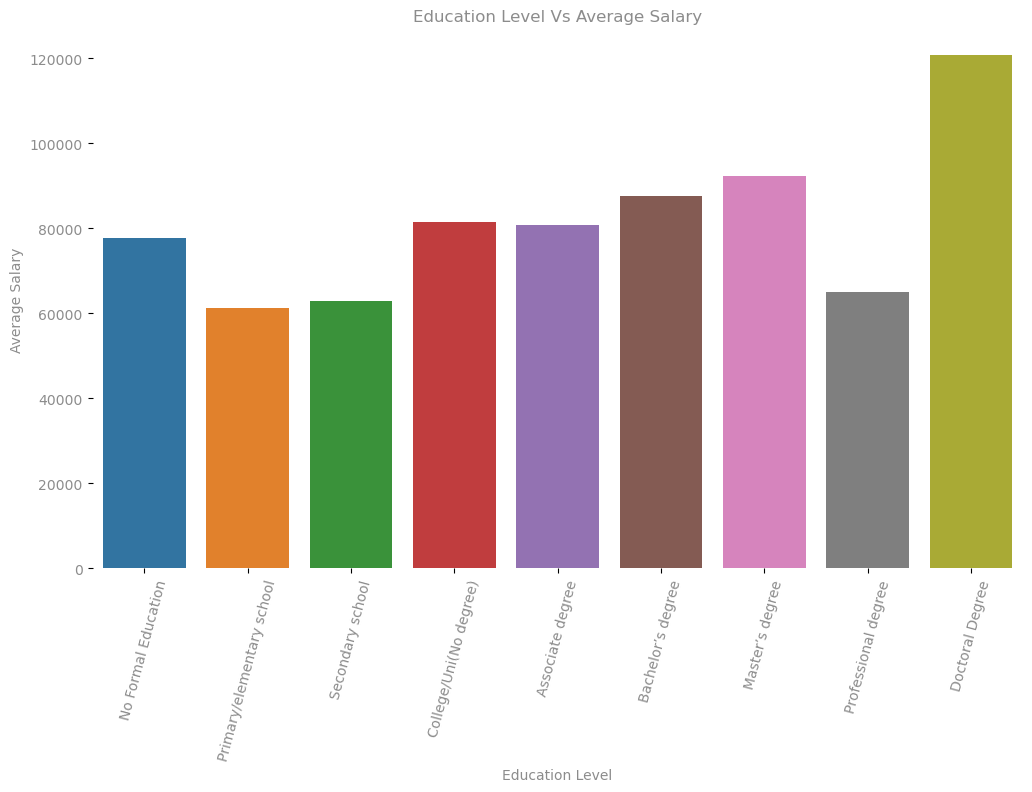

In [151]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.despine(bottom=True, left=True)
ax=sns.barplot(x="EdLevel", y="MeanSalary", data=edlevel_vs_salary)
ax.set_xticks(ticks=range(0, len(edlevel_vs_salary)), labels=edlevel_vs_salary["EdLevel"], rotation=75, color="#8C8C8C")
ax.set_yticks(ticks=range(0, 130000, 20000), labels=range(0, 130000, 20000), color="#8C8C8C")
ax.set_title("Education Level Vs Average Salary", color="#8C8C8C")
ax.set_xlabel("Education Level", color="#8C8C8C")
ax.set_ylabel("Average Salary", color="#8C8C8C")
plt.show()

### Conclusion 
* There is a general trend that developers with higher education levels tend to earn more.
* But the average salary for developers with no formal education is quite high as well, higher than even those with professional degrees.

## Developers By Country
Let's get the top 5 countries with highest number of Developers

In [152]:
combined_df["Country"].value_counts()

United States               28548
United States of America    16684
India                        9584
United Kingdom               8613
Germany                      8145
                            ...  
Seychelles                      1
Eritrea                         1
Sierra Leone                    1
Gambia                          1
North Korea                     1
Name: Country, Length: 182, dtype: int64

In [161]:
# United states has more two different values i.e United States and United States of America.
# Same for United Kingdom
# Should make them same because they represent the same country.
combined_df.loc[combined_df["Country"] == "United States of America", "Country"] = "United States"
combined_df.loc[combined_df["Country"] == "United Kingdom of Great Britain and Northern Ireland", "Country"] \
    = "United Kingdom"

In [177]:
devs_by_country = combined_df.groupby("Country").size().reset_index(name="NoDevs")\
    .sort_values(by="NoDevs", ascending=False).reset_index(drop=True)
devs_by_country

,Country,NoDevs
0,United States,45232
1,India,9584
2,United Kingdom,8647
3,Germany,8145
4,Canada,4416
...,...,...
175,Grenada,1
176,Chad,1
177,Gambia,1
178,Eritrea,1


In [183]:
top5 = dev_by_country.iloc[:5, 0].values.tolist()
devs_by_country.loc[~devs_by_country["Country"].isin(top5), "Country"] = "Others"
top_devs = devs_by_country.groupby("Country").sum().reset_index()\
    .sort_values(by="NoDevs", ascending=False)
top_devs

,Country,NoDevs
2,Others,65682
4,United States,45232
1,India,9584
3,United Kingdom,8647
0,Germany,8145


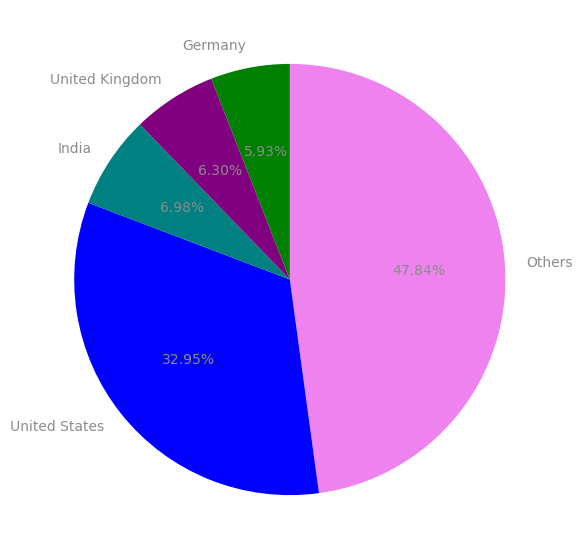

In [204]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.pie(
    x=top_devs["NoDevs"],
    labels=top_devs["Country"],
    autopct="%.2f%%",
    colors=["Violet", "blue", "teal", "purple", "green"],
    textprops={'color':"#8C8C8C"},
    startangle=90,
    counterclock=False
)
plt.show()

#### Conclusion
* The top 4 countries are USA, India, Germany and United Kingdom.
* Together thay accounted for more than 50% of the total number of developers over the 5 years.